In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

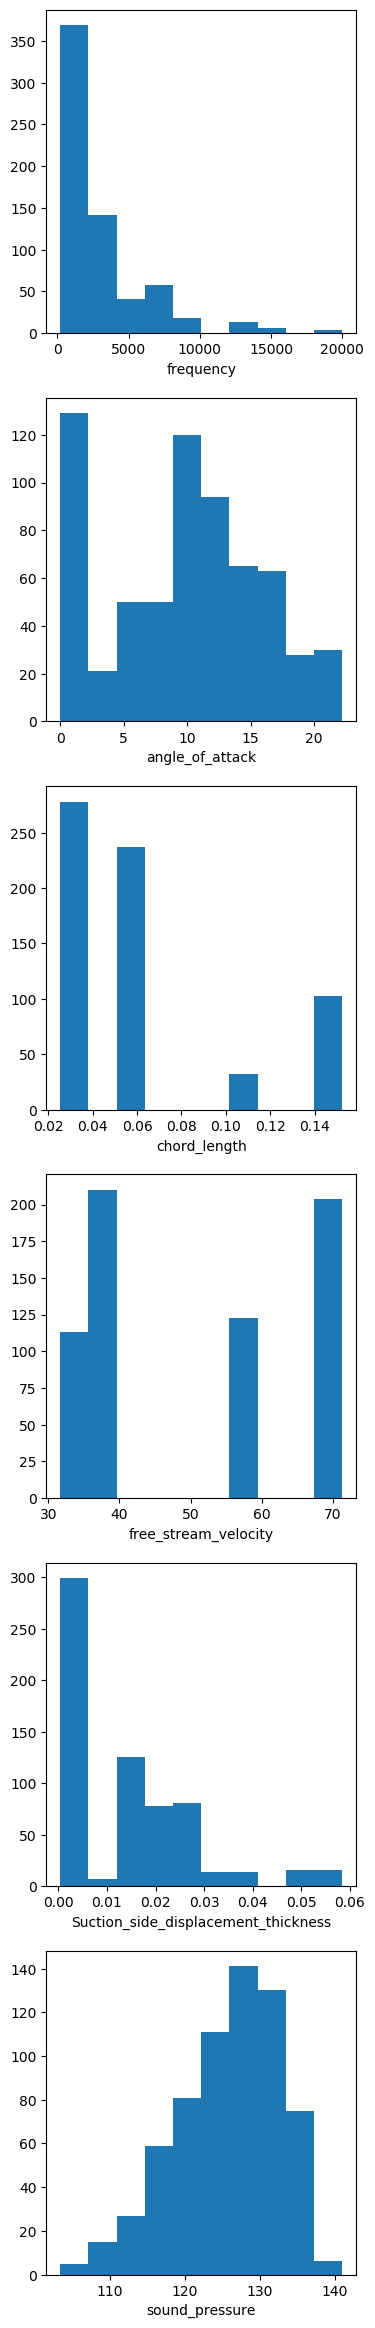

In [46]:
column = ['frequency', 'angle_of_attack', 'chord_length', 'free_stream_velocity', 
          'Suction_side_displacement_thickness','sound_pressure']
trainData = pd.read_csv("airfoil_self_noise_train.csv", delimiter = ',', names = column)
testData = pd.read_csv("airfoil_self_noise_test.csv", delimiter = ',', names = column)
fig, axs = plt.subplots(6, figsize=(4,30), dpi = 100)
for i, c in enumerate(trainData.columns):
    axs[i].hist(trainData[c], bins = 10)
    axs[i].set_xlabel(c)

### 2(ii)

In [47]:
df1 = pd.Series([1]*len(trainData))
df1.name = 'constant'

In [48]:
newTrainData = pd.concat([df1,trainData], axis = 1)

In [49]:
x_train = newTrainData.loc[:,newTrainData.columns[:-1]]
y_train = newTrainData.loc[:,newTrainData.columns[-1]]

In [50]:
XTX = np.dot(x_train.values.T, x_train.values)
XTy = np.dot(x_train.values.T, y_train.values)
#w = np.linalg.solve(XTX,XTy)
w = np.dot(np.linalg.inv(XTX), XTy)

In [51]:
w

array([ 1.32303685e+02, -7.11322380e-04, -4.54774159e-01, -5.23017057e+01,
        8.39826774e-02, -9.14287813e+01])

### 2(iii)

In [52]:
df2 = pd.Series([1]*len(testData))
df2.name = 'constant'
newTestData = pd.concat([df2, testData], axis = 1)

In [53]:
x_test = newTestData.loc[:, newTestData.columns[:-1]]
y_test = newTestData.loc[:, newTestData.columns[-1]]

In [54]:
RSS = np.dot(((y_test.values - np.dot(x_test.values, w)).T), (y_test.values - np.dot(x_test.values, w)))

In [55]:
RSS

5136.396371509611

In [56]:
np.sqrt(RSS)

71.66865682786033

### 2(iv) features: constant, frequency, angle of attack

In [20]:
x_train1 = newTrainData.loc[:,newTrainData.columns[0:3]]  #features: constant, frequency, angle of attack
XTX = np.dot(x_train1.values.T, x_train1.values)
XTy = np.dot(x_train1.values.T, y_train.values)
w = np.linalg.solve(XTX,XTy)

In [21]:
w

array([ 1.32258796e+02, -5.16159604e-04, -5.15175878e-01])

In [22]:
x_test1 = newTestData.loc[:, newTestData.columns[0:3]]
RSS = np.dot(((y_test.values - np.dot(x_test1.values, w)).T), (y_test.values - np.dot(x_test1.values, w)))

In [23]:
RSS

12915.509844963704

In [24]:
np.sqrt(RSS)

113.64642469063294

### 2(iv) features: constant, frequency, angle of attack, chorad length, free-stream velocity

In [40]:
x_train2 = newTrainData.loc[:,newTrainData.columns[0:5]]
XTX = np.dot(x_train2.values.T, x_train2.values)
XTy = np.dot(x_train2.values.T, y_train.values)
w = np.linalg.solve(XTX,XTy)

In [41]:
w

array([ 1.33215551e+02, -7.28575004e-04, -5.99817491e-01, -6.77716041e+01,
        8.73225394e-02])

In [42]:
x_test2 = newTestData.loc[:, newTestData.columns[0:5]]
RSS = np.dot(((y_test.values - np.dot(x_test2.values, w)).T), (y_test.values - np.dot(x_test2.values, w)))

In [43]:
RSS


11312.632392019817

In [44]:
np.sqrt(RSS)

106.36085930463244

### My finding is that the more features, the less RSS will be.